In [1]:
import cv2
import numpy as np
import pandas as pd
from featureextraction import calculate_rgb_statistic, calculate_hsv_statistic, calculate_lab_statistic

image_1 = cv2.imread('./data/preprocessed/train/benign/100.jpg')
image_1_features = []

image_1_features.append(calculate_rgb_statistic(image_1))
image_1_features.append(calculate_hsv_statistic(image_1))
image_1_features.append(calculate_lab_statistic(image_1))

combined_features = pd.concat(image_1_features, axis=0)
display(combined_features)
print(combined_features.shape)


rgb_mean_b         59.911705
rgb_mean_g         60.331315
rgb_mean_r        104.362933
rgb_var_b         400.080162
rgb_var_g         492.601633
rgb_var_r        1162.918397
rgb_skew_b          0.052068
rgb_skew_g          0.159390
rgb_skew_r         -0.546902
rgb_kurt_b          1.157588
rgb_kurt_g          0.744364
rgb_kurt_r          0.500353
rgb_entropy_b       8.627358
rgb_entropy_g       8.614849
rgb_entropy_r       8.625866
hsv_mean_h         87.121929
hsv_mean_s        137.689525
hsv_mean_v         88.456066
hsv_var_h        6401.176542
hsv_var_s        2957.259446
hsv_var_v        2380.790346
hsv_skew_h          0.043132
hsv_skew_s          1.474080
hsv_skew_v         -0.584572
hsv_kurt_h         -1.864578
hsv_kurt_s          0.697107
hsv_kurt_v         -0.684046
entropy_h           8.257625
entropy_s           8.732033
entropy_v           8.582653
lab_mean_l         66.647631
lab_mean_a        144.424073
lab_mean_b        135.368398
lab_var_l        1386.547655
lab_var_a     

(45,)


In [2]:
# calculate shape features

from featureextraction import calculate_shape_features

image_1 = cv2.imread('./data/preprocessed/train/benign/100.jpg')

image_1_features = calculate_shape_features(image_1)
display(image_1_features)
print(image_1_features.shape)

shape_area        7347.000000
shape_mean           8.756457
shape_std_dev       25.255090
shape_variance     637.819593
dtype: float64

(4,)


In [18]:
# Specify the distances and angles for GLCM computation

import cv2

import numpy as np
from featureextraction import calculate_texture_features
%load_ext autoreload
%autoreload 2

image = cv2.imread('./data/preprocessed/train/malignant/10.jpg')

result = calculate_texture_features(image)
result


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


glcm_contrast       263.181192
glcm_energy           0.757581
glcm_homogeneity      0.840391
glcm_correlation      0.948549
dtype: float64

In [2]:



import os
import cv2
import cv2
from skimage.feature import hog
from skimage import exposure
from sklearn.decomposition import PCA

folder_path = "data/preprocessed/test/malignant"
images = []
# Check if the folder exists
if not os.path.exists(folder_path):
    print(f"The folder '{folder_path}' does not exist.")
else:
    # Get a list of all files in the folder
    files = os.listdir(folder_path)

    # Iterate through each file in the folder
    for file_name in files:
        # Construct the full path to the image file
        file_path = os.path.join(folder_path, file_name)

        # Check if the file is a valid image file
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Read the image using OpenCV
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            resized_image = cv2.resize(image, (112, 122))
            images.append(resized_image)
        else:
            print(f"Skipping non-image file: {file_name}")
  
print(len(images))

image_features = []

for image in images:
    # Compute HOG features
    
    features, _ = hog(image, orientations=8, pixels_per_cell=(8, 8),
                            cells_per_block=(1, 1), visualize=True)

    # Optionally, you can enhance the visualization of HOG features
    image_features.append(features)

display(image_features[0].shape)   
pca = PCA(n_components=100)
pca_result = pca.fit_transform(image_features)
# make it to dataframe
import pandas as pd
pca_result = pd.DataFrame(pca_result, columns=['HOG_PCA_%i' % i for i in range(100)])
pca_result.head()

300


(1680,)

,HOG_PCA_0,HOG_PCA_1,HOG_PCA_2,HOG_PCA_3,HOG_PCA_4,HOG_PCA_5,HOG_PCA_6,HOG_PCA_7,HOG_PCA_8,HOG_PCA_9,...,HOG_PCA_90,HOG_PCA_91,HOG_PCA_92,HOG_PCA_93,HOG_PCA_94,HOG_PCA_95,HOG_PCA_96,HOG_PCA_97,HOG_PCA_98,HOG_PCA_99
0,-0.484250,3.275221,0.726133,-0.547627,1.389200,-2.078880,-2.176985,2.616154,0.388496,0.005224,...,0.140329,0.168570,-1.455506,0.394187,-0.470512,-0.252624,-0.248622,0.202295,-0.269964,0.030703
1,-1.404760,1.070341,-0.352504,-0.080001,1.611410,-0.427151,2.339965,-0.327320,2.110521,-0.864986,...,0.355563,0.648451,0.124563,-0.079001,-1.208541,0.148674,0.059798,0.153902,-0.058207,0.193897
2,4.892988,1.284230,-0.713865,-0.654459,0.499745,-2.905148,1.313636,0.109009,-0.798828,-0.669673,...,0.212126,0.138079,-0.051433,-0.948575,-0.601541,0.055449,-0.512706,-0.089521,0.001817,0.008129
3,1.646529,-3.270239,-0.078424,-0.188521,1.747291,-0.505462,-0.552281,-1.060716,1.670366,-1.488186,...,-0.786771,-0.388654,0.485510,-0.247219,0.041535,0.591182,-0.734204,-0.075807,-0.161177,0.038551
4,-2.461623,-1.668215,-0.330555,-1.283387,1.238183,1.435741,-1.496556,0.806315,0.631527,1.265061,...,-0.168047,0.232453,-0.106054,0.532249,0.442343,0.382464,0.130749,0.240851,-0.112040,0.274763


,glcm_contrast,glcm_energy,glcm_homogeneity,glcm_correlation
label,,,,
0,187.342767,0.715521,0.820519,0.943889
1,260.177788,0.619159,0.753890,0.938174


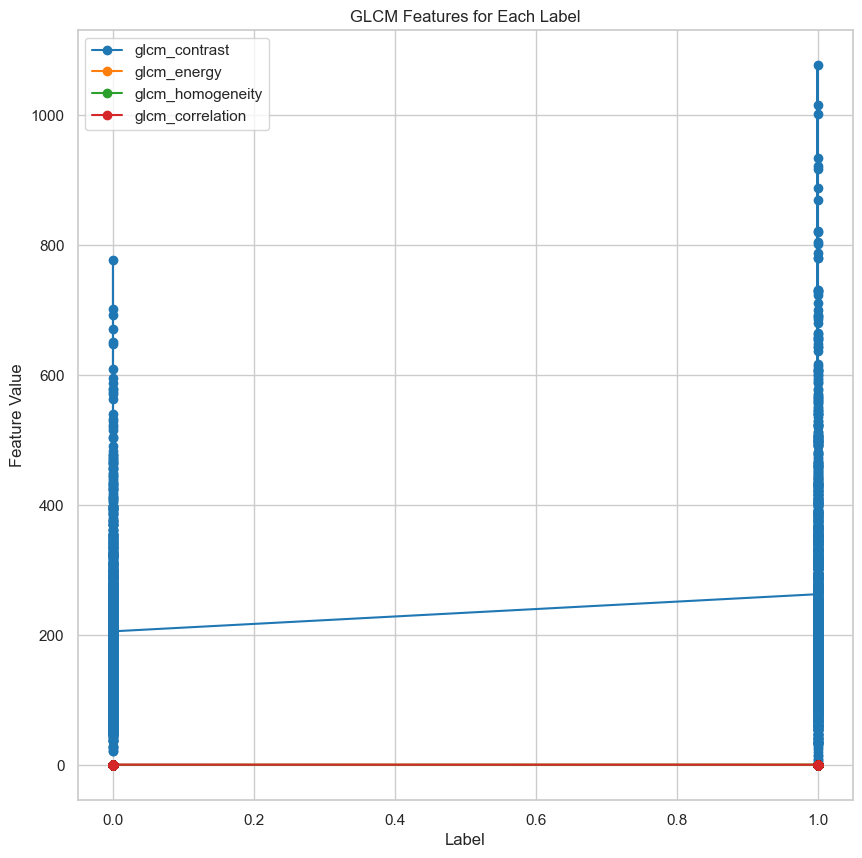

In [16]:
# read train_features

import pandas as pd
train_features = pd.read_csv('./data/features/train_features.csv')

glcm_features = train_features.filter(regex='glcm')

glcm_with_labels = pd.concat([glcm_features, train_features['label']], axis=1)

# find mean of glcm features on each label group
mean = glcm_with_labels.groupby('label').mean()

display(mean)

# plot glcm features
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.set_context('notebook')

fig, ax = plt.subplots(figsize=(10, 10))

for feature in ['glcm_contrast', 'glcm_energy', 'glcm_homogeneity', 'glcm_correlation']:
    ax.plot(glcm_with_labels['label'], glcm_with_labels[feature], label=feature, marker='o')

# Set labels and title
ax.set_xlabel('Label')
ax.set_ylabel('Feature Value')
ax.set_title('GLCM Features for Each Label')


# Add legend
ax.legend()

# Show the plot
plt.show()

In [24]:
# starts with rgb ends with b
color_features = train_features.filter(regex='glcm')

color_with_labels = pd.concat([color_features, train_features['label']], axis=1)

display(color_with_labels.head())

# save to csv
color_with_labels.to_csv('./test.csv', index=False)

,glcm_contrast,glcm_energy,glcm_homogeneity,glcm_correlation,label
0,96.314421,0.842023,0.889208,0.925281,0
1,69.949312,0.860061,0.904631,0.932363,0
2,141.161339,0.616404,0.755495,0.959801,0
3,431.996791,0.517896,0.716687,0.953286,0
4,274.711059,0.543754,0.718011,0.969052,0


In [8]:
shape_features = train_features.filter(regex='shape')

shape_with_labels = pd.concat([shape_features, train_features['label']], axis=1)

# find mean of shape features on each label group
mean = shape_with_labels.groupby('label').mean()
std_dev = shape_with_labels.groupby('label').std()

combined = pd.concat([mean, std_dev], axis=1)
display(combined)


,shape_area,shape_mean,shape_std_dev,shape_variance,shape_area,shape_mean,shape_std_dev,shape_variance
label,,,,,,,,
0,13412.646528,24.668809,42.088534,2009.822758,7889.919276,18.960626,15.444860,1419.068875
1,18170.329156,35.004082,47.731713,2611.359403,9520.377615,24.771556,18.257094,1796.069121


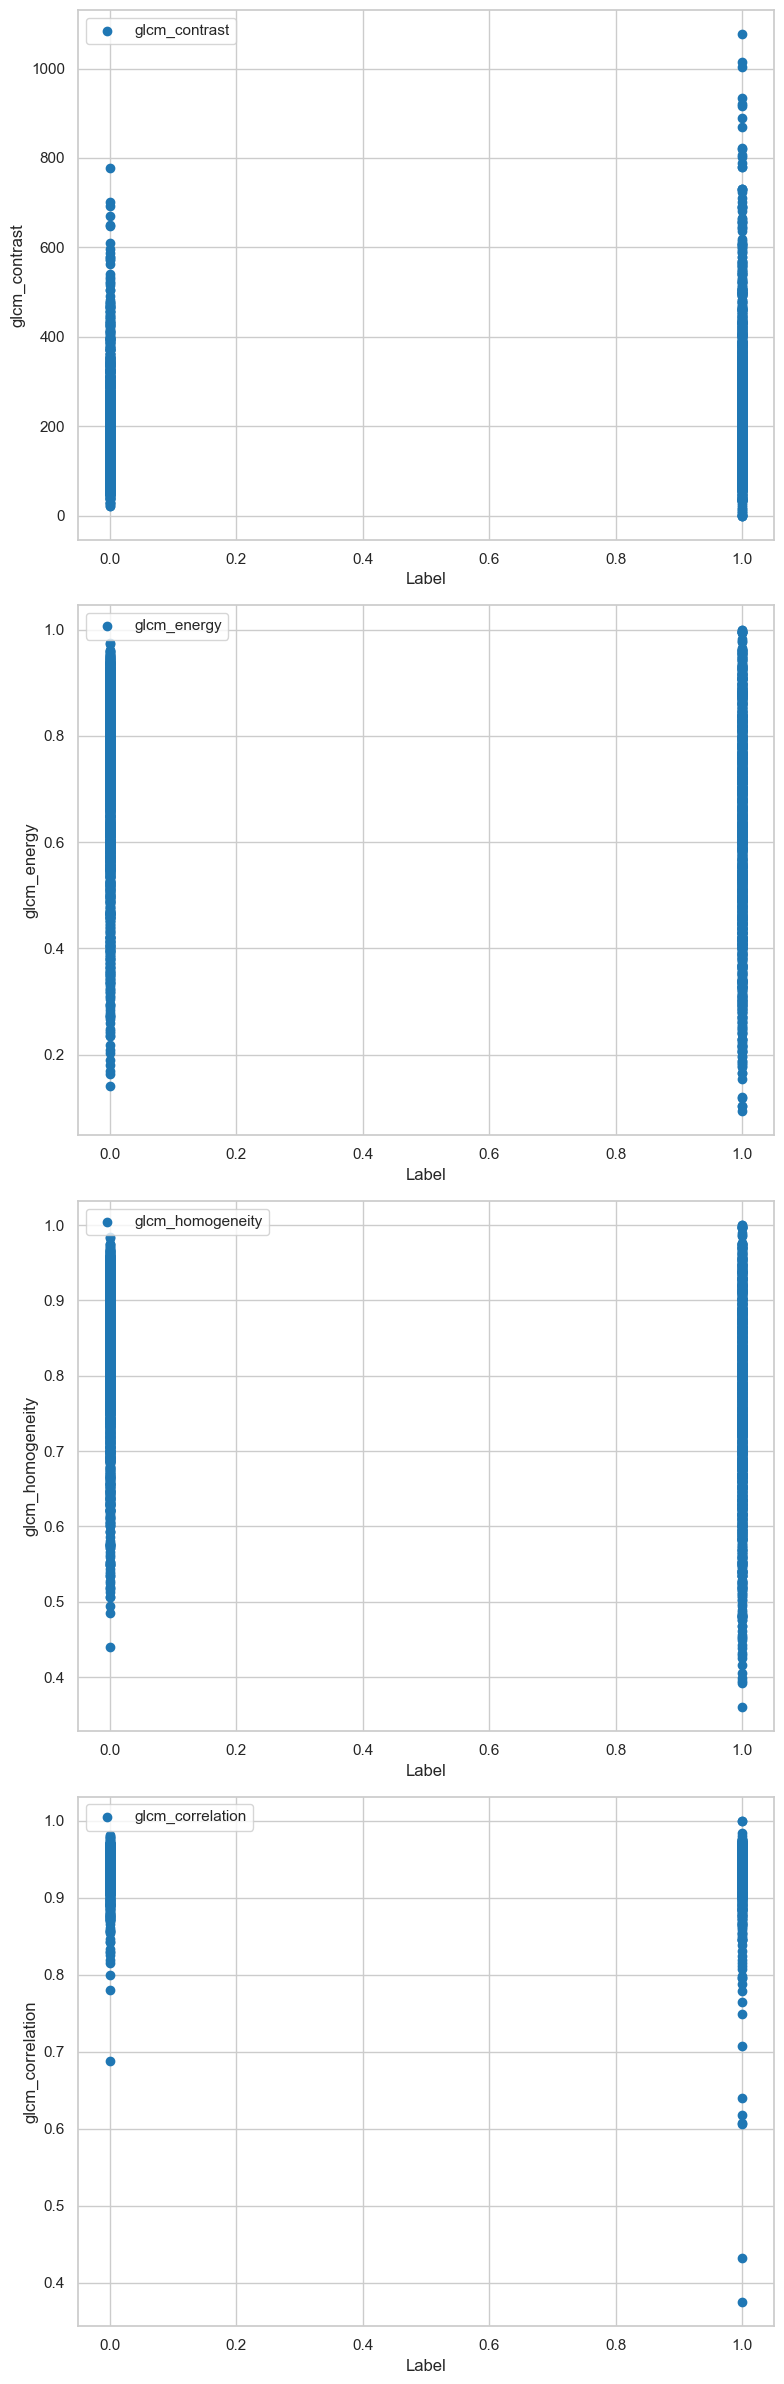

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a DataFrame df


# Plot each feature in a separate subplot
features = ['glcm_contrast', 'glcm_energy', 'glcm_homogeneity', 'glcm_correlation']

fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(8, 6 * len(features)))

for i, feature in enumerate(features):
    axes[i].scatter(glcm_with_labels['label'], glcm_with_labels[feature], label=feature)
    axes[i].set_xlabel('Label')
    axes[i].set_ylabel(feature)
    axes[i].legend()

plt.tight_layout()
plt.show()
